In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from numpy import genfromtxt    
from brainspace.datasets import load_conte69
from brainspace.plotting import plot_hemispheres
from brainspace.utils.parcellation import map_to_labels

In [2]:
surf_lh, surf_rh = load_conte69()

glasser = '../data/glasser.csv'
glasser = genfromtxt(glasser)

glasser_r = glasser[32492:]
glasser_l = glasser[:32492]
glasser_r[np.where(glasser_r == 180)] = 0

glasser = np.concatenate((glasser_l,glasser_r))

labeling = glasser.copy()

mymask = labeling != 0

## Cohen’s d for normalized Asymmetry Scores: (l-r)/(l+r)

### read-in the t-values of normalized Asymmetry Scores from G1, G2, G3 and for intra- & inter-hems. 

In [3]:
df = pd.DataFrame()
coef = pow(1014, 0.5)
df['intra_g1'] = pd.read_csv('../data/data_results/supplementary/normalize/intra_g1_stats.csv')['0']/coef
df['intra_g2'] = pd.read_csv('../data/data_results/supplementary/normalize/intra_g2_stats.csv')['0']/coef
df['intra_g3'] = pd.read_csv('../data/data_results/supplementary/normalize/intra_g3_stats.csv')['0']/coef
df['inter_g1'] = pd.read_csv('../data/data_results/supplementary/normalize/inter_g1_stats.csv')['0']/coef
df['inter_g2'] = pd.read_csv('../data/data_results/supplementary/normalize/inter_g2_stats.csv')['0']/coef
df['inter_g3'] = pd.read_csv('../data/data_results/supplementary/normalize/inter_g3_stats.csv')['0']/coef
df['intra_g1_fdr'] = pd.read_csv('../data/data_results/supplementary/normalize/g_stats_fdr.csv')['intra_g1_fdr']
df['intra_g2_fdr'] = pd.read_csv('../data/data_results/supplementary/normalize/g_stats_fdr.csv')['intra_g2_fdr']
df['intra_g3_fdr'] = pd.read_csv('../data/data_results/supplementary/normalize/g_stats_fdr.csv')['intra_g3_fdr']
df['inter_g1_fdr'] = pd.read_csv('../data/data_results/supplementary/normalize/g_stats_fdr.csv')['inter_g1_fdr']
df['inter_g2_fdr'] = pd.read_csv('../data/data_results/supplementary/normalize/g_stats_fdr.csv')['inter_g2_fdr']
df['inter_g3_fdr'] = pd.read_csv('../data/data_results/supplementary/normalize/g_stats_fdr.csv')['inter_g3_fdr']

### Compute Cohen's d for the t-values

In [4]:
intra_g1_cohen = map_to_labels(np.concatenate((df['intra_g1'],-df['intra_g1'])), labeling, mask=mymask)
intra_g1_cohen[np.where(intra_g1_cohen==0)] = np.nan
intra_g1_fdr = map_to_labels(np.concatenate((df['intra_g1_fdr'],df['intra_g1_fdr'])), labeling, mask=mymask)
intra_g1_fdr[np.where(intra_g1_fdr==0)] = np.nan

intra_g2_cohen = map_to_labels(np.concatenate((df['intra_g2'],-df['intra_g2'])), labeling, mask=mymask)
intra_g2_cohen[np.where(intra_g2_cohen==0)] = np.nan
intra_g2_fdr = map_to_labels(np.concatenate((df['intra_g2_fdr'],df['intra_g2_fdr'])), labeling, mask=mymask)
intra_g2_fdr[np.where(intra_g2_fdr==0)] = np.nan

intra_g3_cohen = map_to_labels(np.concatenate((df['intra_g3'],-df['intra_g3'])), labeling, mask=mymask)
intra_g3_cohen[np.where(intra_g3_cohen==0)] = np.nan
intra_g3_fdr = map_to_labels(np.concatenate((df['intra_g3_fdr'],df['intra_g3_fdr'])), labeling, mask=mymask)
intra_g3_fdr[np.where(intra_g3_fdr==0)] = np.nan

inter_g1_cohen = map_to_labels(np.concatenate((df['inter_g1'],-df['inter_g1'])), labeling, mask=mymask)
inter_g1_cohen[np.where(inter_g1_cohen==0)] = np.nan
inter_g1_fdr = map_to_labels(np.concatenate((df['inter_g1_fdr'],df['inter_g1_fdr'])), labeling, mask=mymask)
inter_g1_fdr[np.where(inter_g1_fdr==0)] = np.nan

inter_g2_cohen = map_to_labels(np.concatenate((df['inter_g2'],-df['inter_g2'])), labeling, mask=mymask)
inter_g2_cohen[np.where(inter_g2_cohen==0)] = np.nan
inter_g2_fdr = map_to_labels(np.concatenate((df['inter_g2_fdr'],df['inter_g2_fdr'])), labeling, mask=mymask)
inter_g2_fdr[np.where(inter_g2_fdr==0)] = np.nan

inter_g3_cohen = map_to_labels(np.concatenate((df['inter_g3'],-df['inter_g3'])), labeling, mask=mymask)
inter_g3_cohen[np.where(inter_g3_cohen==0)] = np.nan
inter_g3_fdr = map_to_labels(np.concatenate((df['inter_g3_fdr'],df['inter_g3_fdr'])), labeling, mask=mymask)
inter_g3_fdr[np.where(inter_g3_fdr==0)] = np.nan

### visualize Cohen's d 

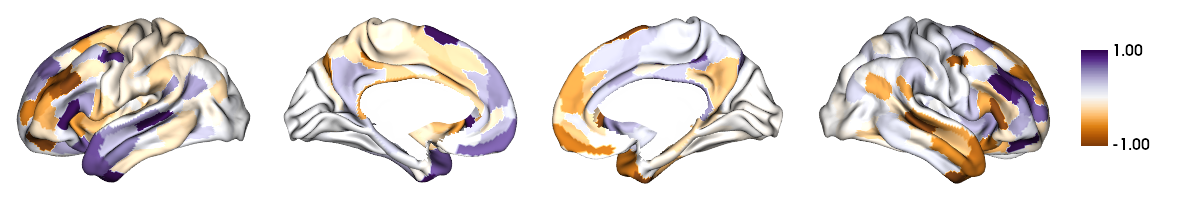

In [5]:
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(intra_g1_cohen,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'PuOr', color_bar = True, color_range = (-1, 1),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/s7_intra_g1_cohen_norm.svg',scale=(2,2))
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(intra_g1_cohen,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'PuOr', color_bar = True, color_range = (-1, 1),
                 interactive = False, zoom = 1.5, embed_nb = True)

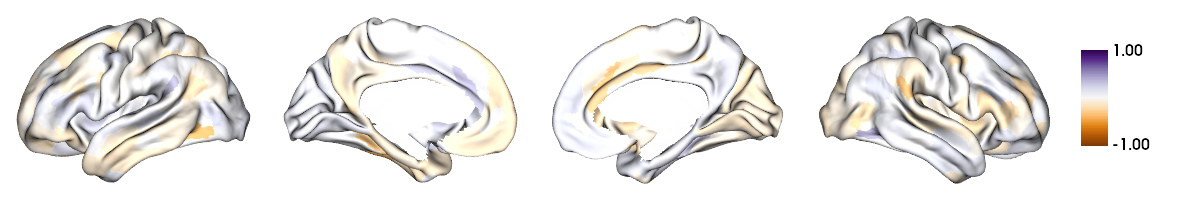

In [6]:
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(intra_g2_cohen,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'PuOr', color_bar = True, color_range = (-1, 1),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/s7_intra_g2_cohen_norm.svg',scale=(2,2))
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(intra_g2_cohen,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'PuOr', color_bar = True, color_range = (-1, 1),
                 interactive = False, zoom = 1.5, embed_nb = True)

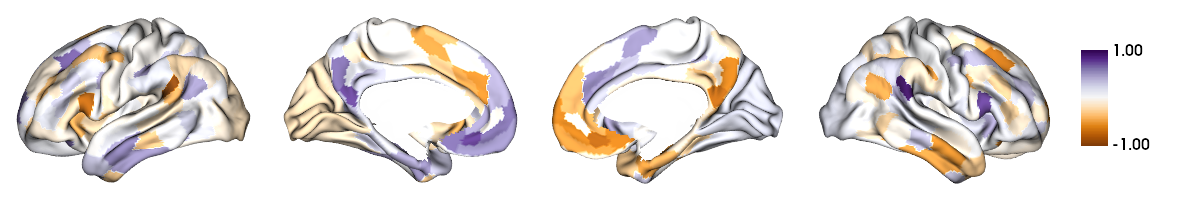

In [7]:
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(intra_g3_cohen,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'PuOr', color_bar = True, color_range = (-1, 1),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/s7_intra_g3_cohen_norm.svg',scale=(2,2))
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(intra_g3_cohen,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'PuOr', color_bar = True, color_range = (-1, 1),
                 interactive = False, zoom = 1.5, embed_nb = True)

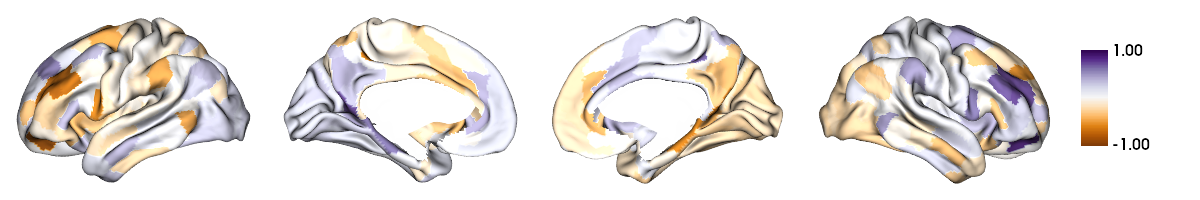

In [8]:
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(inter_g1_cohen,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'PuOr', color_bar = True, color_range = (-1, 1),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/s7_inter_g1_cohen_norm.svg',scale=(2,2))
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(inter_g1_cohen,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'PuOr', color_bar = True, color_range = (-1, 1),
                 interactive = False, zoom = 1.5, embed_nb = True)

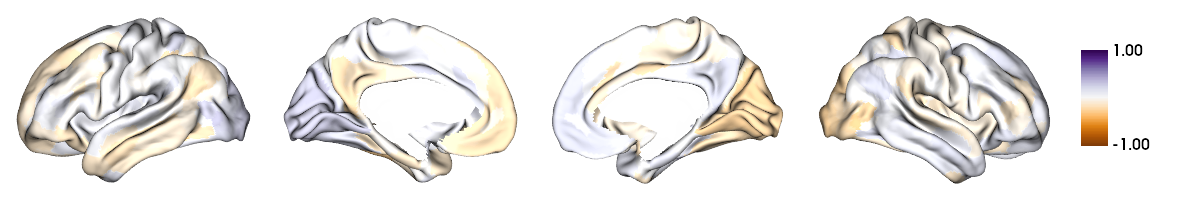

In [9]:
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(inter_g2_cohen,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'PuOr', color_bar = True, color_range = (-1, 1),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/s7_inter_g2_cohen_norm.svg',scale=(2,2))
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(inter_g2_cohen,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'PuOr', color_bar = True, color_range = (-1, 1),
                 interactive = False, zoom = 1.5, embed_nb = True)

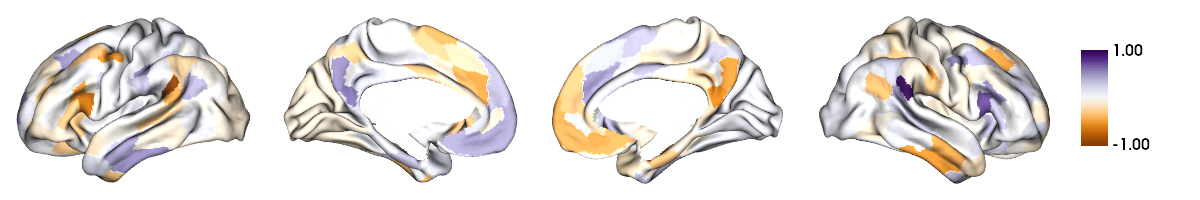

In [10]:
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(inter_g3_cohen,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'PuOr', color_bar = True, color_range = (-1, 1),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/s7_inter_g3_cohen_norm.svg',scale=(2,2))
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(inter_g3_cohen,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'PuOr', color_bar = True, color_range = (-1, 1),
                 interactive = False, zoom = 1.5, embed_nb = True)

### vizualize p(FDR)

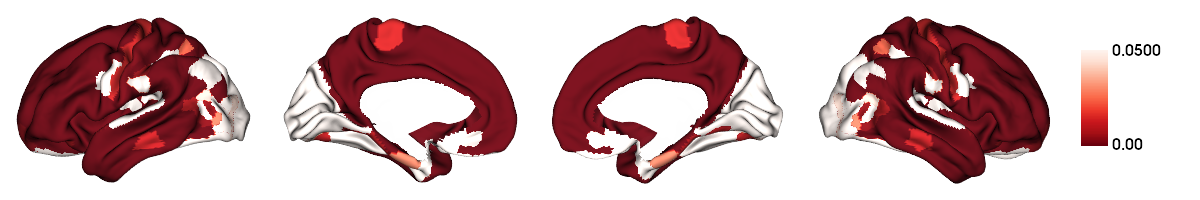

In [11]:
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(intra_g1_fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Reds_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/s7_intra_g1_fdr_norm.svg',scale=(2,2))
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(intra_g1_fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Reds_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True)

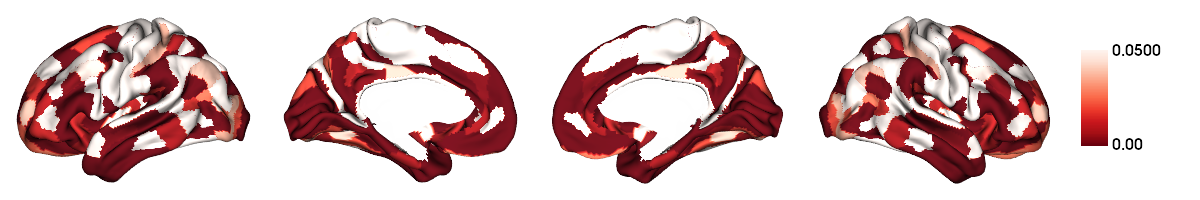

In [12]:
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(intra_g2_fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Reds_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/s7_intra_g2_fdr_norm.svg',scale=(2,2))
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(intra_g2_fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Reds_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True)

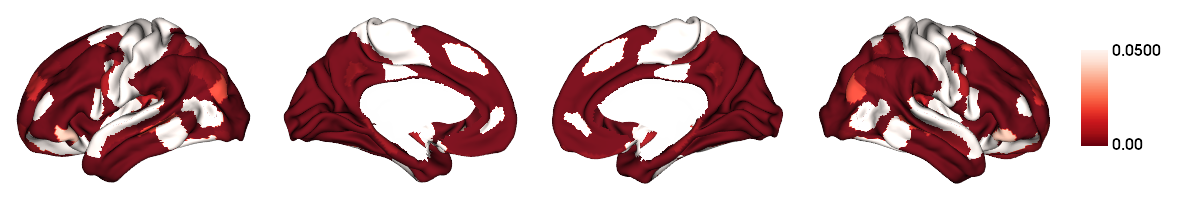

In [13]:
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(intra_g3_fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Reds_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/s7_intra_g3_fdr_norm.svg',scale=(2,2))
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(intra_g3_fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Reds_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True)

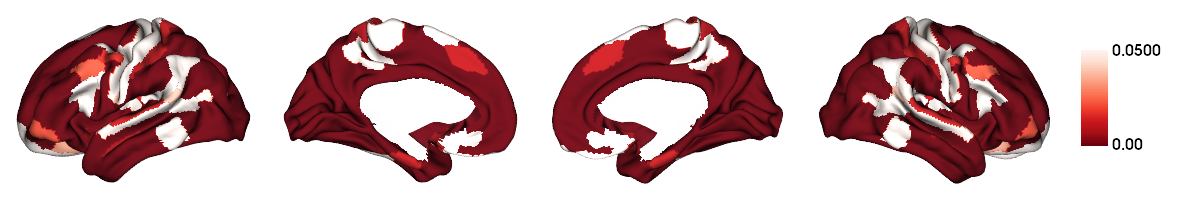

In [14]:
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(inter_g1_fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Reds_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/s7_inter_g1_fdr_norm.svg',scale=(2,2))
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(inter_g1_fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Reds_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True)

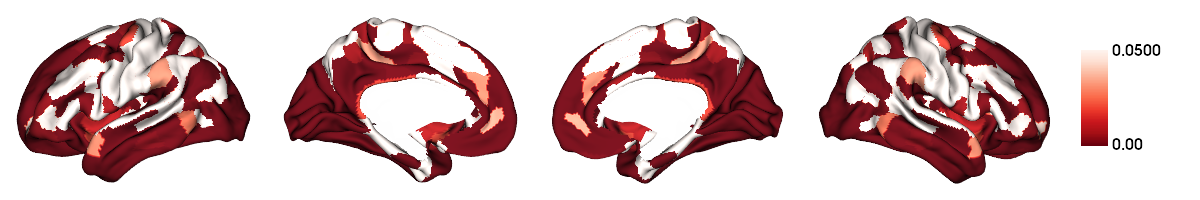

In [15]:
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(inter_g2_fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Reds_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/s7_inter_g2_fdr_norm.svg',scale=(2,2))
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(inter_g2_fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Reds_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True)

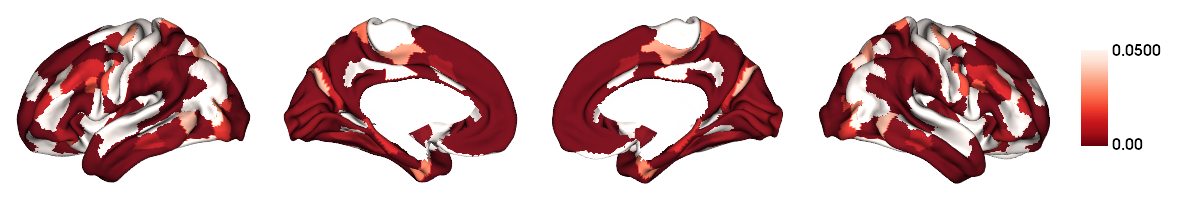

In [16]:
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(inter_g3_fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Reds_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/s7_inter_g3_fdr_norm.svg',scale=(2,2))
plot_hemispheres(surf_lh, surf_rh, array_name = np.array(inter_g3_fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Reds_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True)

### correlation between not-normalized AI and normalized AI

In [17]:
df_non = pd.DataFrame()
df_non['intra_g1'] = pd.read_csv('../data/data_results/gradient/intra_g1_stats.csv')['0']/coef
df_non['intra_g2'] = pd.read_csv('../data/data_results/gradient/intra_g2_stats.csv')['0']/coef
df_non['intra_g3'] = pd.read_csv('../data/data_results/gradient/intra_g3_stats.csv')['0']/coef
df_non['inter_g1'] = pd.read_csv('../data/data_results/gradient/inter_g1_stats.csv')['0']/coef
df_non['inter_g2'] = pd.read_csv('../data/data_results/gradient/inter_g2_stats.csv')['0']/coef
df_non['inter_g3'] = pd.read_csv('../data/data_results/gradient/inter_g3_stats.csv')['0']/coef

In [18]:
from scipy import stats
import seaborn as sns

SpearmanrResult(correlation=0.8507114417111638, pvalue=1.3394524544285006e-51)

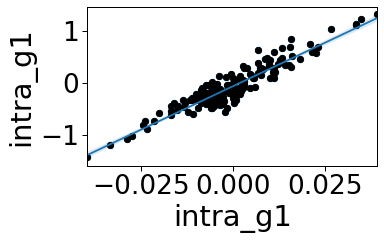

In [19]:
sns.set_context("paper", font_scale = 3)
x, y = df['intra_g1']/coef, df_non['intra_g1']
f  = sns.regplot(x,y,scatter_kws={'s': 40})
ax=f.get_figure()
f.scatter(x, y, s=40, c='black')
f.grid(False)
f.figure.tight_layout()
f.figure.savefig('../figures/s7_intra_corr_g1_norm.svg')
stats.spearmanr(x,y)

SpearmanrResult(correlation=0.6808769817998498, pvalue=7.332872121736752e-26)

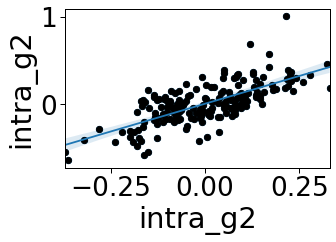

In [20]:
sns.set_context("paper", font_scale = 3)
x, y = df['intra_g2'], df_non['intra_g2']
f  = sns.regplot(x,y,scatter_kws={'s': 40})
ax=f.get_figure()
f.scatter(x, y, s=40, c='black')
f.grid(False)
f.figure.tight_layout()
f.figure.savefig('../figures/s7_intra_corr_g2_norm.svg')
stats.spearmanr(x,y)

SpearmanrResult(correlation=0.7947590975030093, pvalue=1.872947709826086e-40)

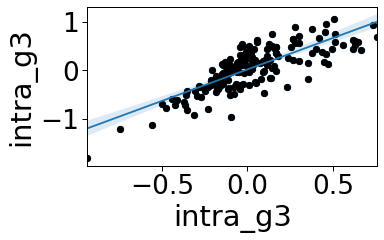

In [21]:
sns.set_context("paper", font_scale = 3)
x, y = df['intra_g3'], df_non['intra_g3']
f  = sns.regplot(x,y,scatter_kws={'s': 40})
ax=f.get_figure()
f.scatter(x, y, s=40, c='black')
f.grid(False)
f.figure.tight_layout()
f.figure.savefig('../figures/s7_intra_corr_g3_norm.svg')
stats.spearmanr(x,y)

SpearmanrResult(correlation=0.863150097225223, pvalue=1.0399916744856332e-54)

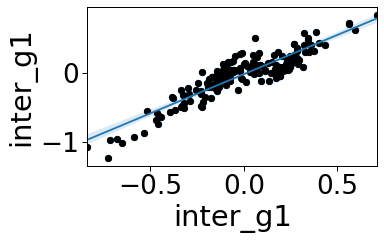

In [22]:
sns.set_context("paper", font_scale = 3)
x, y = df['inter_g1'], df_non['inter_g1']
f  = sns.regplot(x,y,scatter_kws={'s': 40})
ax=f.get_figure()
f.scatter(x, y, s=40, c='black')
f.grid(False)
f.figure.tight_layout()
f.figure.savefig('../figures/s7_inter_corr_g1_norm.svg')
stats.spearmanr(x,y)

SpearmanrResult(correlation=0.2279309032171775, pvalue=0.0020887077023578385)

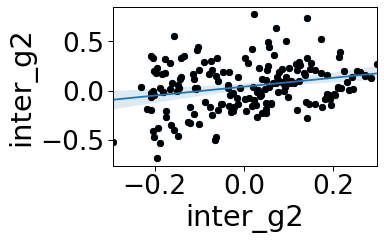

In [23]:
sns.set_context("paper", font_scale = 3)
x, y = df['inter_g2'], df_non['inter_g2']
f  = sns.regplot(x,y,scatter_kws={'s': 40})
ax=f.get_figure()
f.scatter(x, y, s=40, c='black')
f.grid(False)
f.figure.tight_layout()
f.figure.savefig('../figures/s7_inter_corr_g2_norm.svg')
stats.spearmanr(x,y)

SpearmanrResult(correlation=0.8787925553257817, pvalue=4.373693520513855e-59)

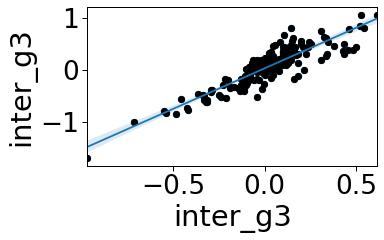

In [24]:
sns.set_context("paper", font_scale = 3)
x, y = df['inter_g3'], df_non['inter_g3']
f  = sns.regplot(x,y,scatter_kws={'s': 40})
ax=f.get_figure()
f.scatter(x, y, s=40, c='black')
f.grid(False)
f.figure.tight_layout()
f.figure.savefig('../figures/s7_inter_corr_g3_norm.svg')
stats.spearmanr(x,y)

## Asymmetry using Desikan-Killiany (DK) atlas


### vizualize DK atlas

In [25]:
import nibabel as nib
l = nib.load('../data/lh.aparc.label.gii').agg_data()
r = nib.load('../data/rh.aparc.label.gii').agg_data()
r = r+35
r[r==35]=0
dk_label = np.concatenate((l,r))

In [26]:
labeling = dk_label.copy()
mask = labeling != 0

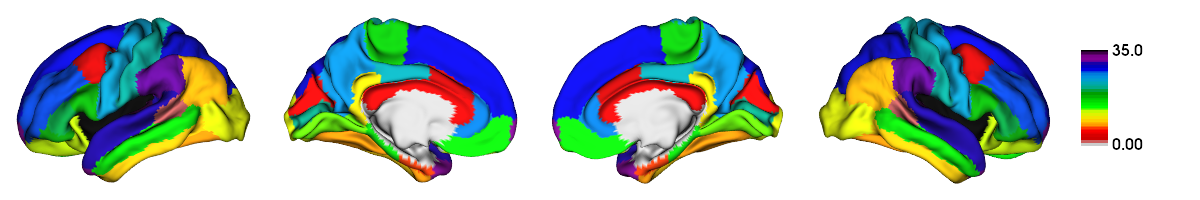

In [27]:
plot_hemispheres(surf_lh, surf_rh, array_name = np.concatenate((l,l)),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'nipy_spectral_r', color_bar = True,color_range = (0, 35),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/s8_dk_atlas.svg')
plot_hemispheres(surf_lh, surf_rh, array_name = np.concatenate((l,l)),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'nipy_spectral_r', color_bar = True,color_range = (0, 35),
                 interactive = False, zoom = 1.5, embed_nb = True)

### variance explained by template gradients in DK atlas

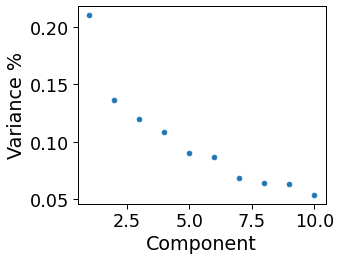

In [28]:
import matplotlib.pyplot as plt

lambd = np.array(pd.read_csv('../data/data_results/supplementary/dk/gradient/group_grad_LL_lambdas.csv',header=None))
explain = lambd/sum(lambd)

sns.set_context("paper", font_scale = 2)
fig, ax = plt.subplots(1, figsize=(5, 4))
ax.scatter(range(1,11), explain)
ax.set_xlabel('Component')
ax.set_ylabel('Variance %')
ax.grid(False)
fig.tight_layout()
fig.savefig('../figures/s8_variance_dk.svg')
plt.show()

### read-in the mean Asymmetry Index for G1, G2, G3 and intra- & inter-hem. for DK atlas

In [29]:
intra = np.array(pd.read_csv('../data/data_results/supplementary/dk/gradient/mean_asym_intra.csv', header=None))[:,:3]
inter = np.array(pd.read_csv('../data/data_results/supplementary/dk/gradient/mean_asym_inter.csv', header=None))[:,:3]
intra_mean = [None]*3
inter_mean = [None]*3

for i in range(3):
  intra_mean[i] = map_to_labels(np.concatenate((intra[:,i],intra[:,i])), labeling, mask=mask)
  intra_mean[i][intra_mean[i]==0]=np.nan
  inter_mean[i] = map_to_labels(np.concatenate((inter[:,i],inter[:,i])), labeling, mask=mask)
  inter_mean[i][inter_mean[i]==0]=np.nan 

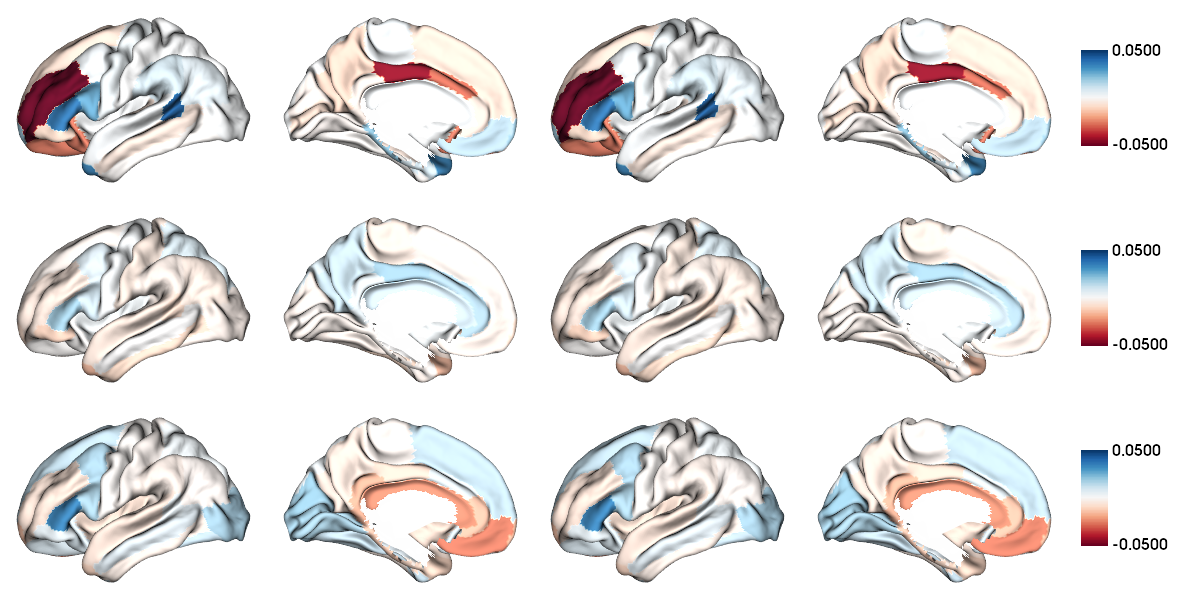

In [30]:
plot_hemispheres(surf_lh, surf_lh, array_name = intra_mean,
                 nan_color = (1,1,1,0.01),size = (1200, 600),
                 cmap = 'RdBu', color_bar = True, color_range = (-0.05, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/s8_dk_intra_mean.svg')
plot_hemispheres(surf_lh, surf_lh, array_name = intra_mean,
                 nan_color = (1,1,1,0.01),size = (1200, 600),
                 cmap = 'RdBu', color_bar = True, color_range = (-0.05, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True)

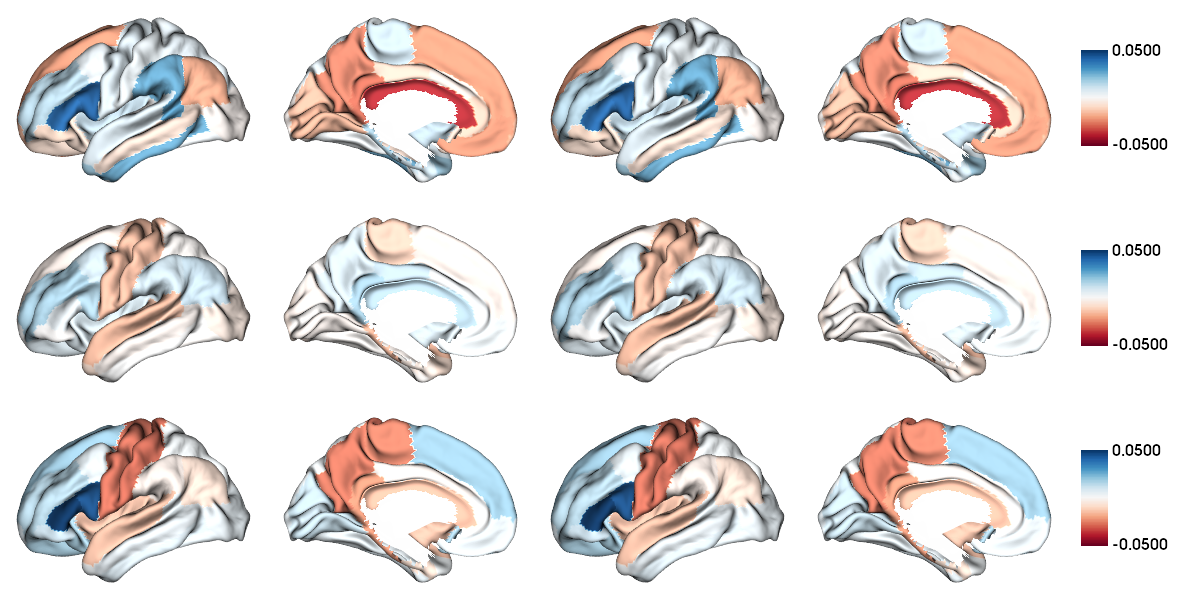

In [31]:
plot_hemispheres(surf_lh, surf_lh, array_name = inter_mean,
                 nan_color = (1,1,1,0.01),size = (1200, 600),
                 cmap = 'RdBu', color_bar = True, color_range = (-0.05, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/s8_dk_inter_mean.svg')
plot_hemispheres(surf_lh, surf_lh, array_name = inter_mean,
                 nan_color = (1,1,1,0.01),size = (1200, 600),
                 cmap = 'RdBu', color_bar = True, color_range = (-0.05, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True)

## Asymmetry using UK Biobank sample (n = 34,604)

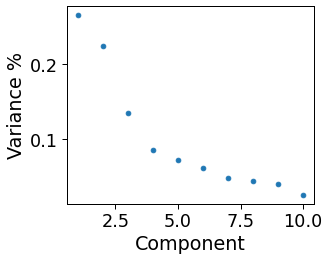

In [32]:
lambd = np.array(pd.read_csv('../data/data_results/supplementary/ukb/gradient/group_grad_LL_lambdas.csv',header=None))
explain = lambd/sum(lambd)

sns.set_context("paper", font_scale = 2)
fig, ax = plt.subplots(1, figsize=(5, 4))
ax.scatter(range(1,11), explain)
ax.set_xlabel('Component')
ax.set_ylabel('Variance %')
ax.grid(False)
fig.tight_layout()
fig.savefig('../figures/s9_ukb_variance.svg')

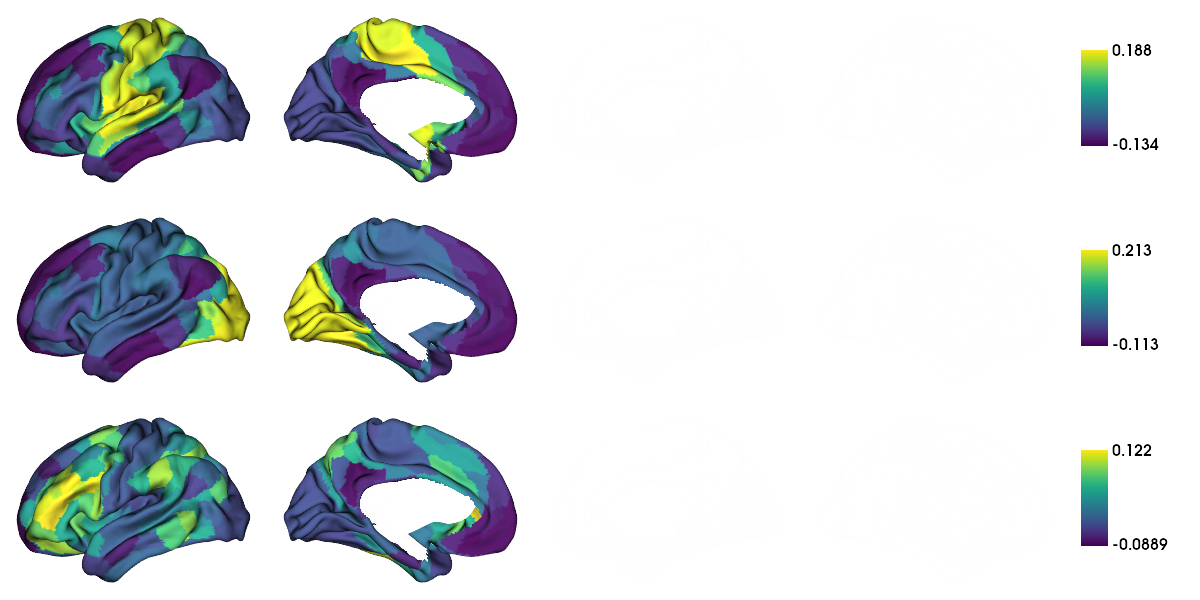

In [33]:
gg_ukb = np.array(pd.read_csv('../data/data_results/supplementary/ukb/gradient/group_grad_LL.csv',header=None))[:,:3]

glasser = '../data/glasser.csv'
glasser = genfromtxt(glasser)

glasser_r = glasser[32492:]
glasser_l = glasser[:32492]
glasser_r[np.where(glasser_r == 180)] = 0

glasser = np.concatenate((glasser_l,glasser_r))

labeling = glasser.copy()

mymask = labeling != 0
gg = [None]*3
for i in range(3):
  gg[i] = map_to_labels(np.concatenate((gg_ukb[:,i],np.zeros(180))), labeling, mask=mymask)
  gg[i][gg[i]==0]=np.nan

plot_hemispheres(surf_lh, surf_rh, array_name = gg,
                 nan_color = (1,1,1,0.01),size = (1200, 600),
                 cmap = 'viridis', color_bar = True, #color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/s9_ukb_group_grad.svg',scale=(2,2))
plot_hemispheres(surf_lh, surf_rh, array_name = gg,
                 nan_color = (1,1,1,0.01),size = (1200, 600),
                 cmap = 'viridis', color_bar = True, #color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True)

### flip G1 axis

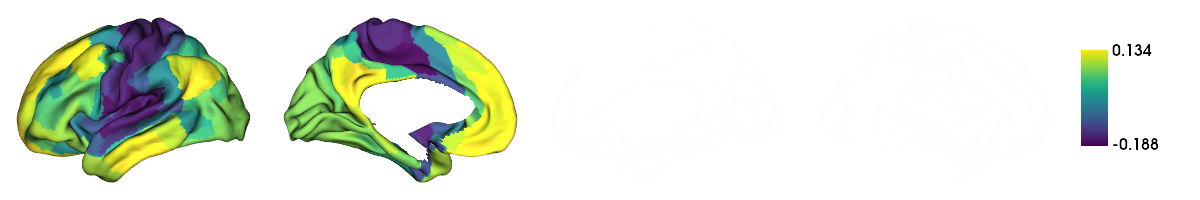

In [34]:
gg = [None]*3
for i in range(3):
  gg[i] = map_to_labels(np.concatenate((-gg_ukb[:,i],np.zeros(180))), labeling, mask=mymask)
  gg[i][gg[i]==0]=np.nan

plot_hemispheres(surf_lh, surf_rh, array_name = gg[0],
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'viridis', color_bar = True, #color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/s9_ukb_group_grad_flip.svg',scale=(2,2))
plot_hemispheres(surf_lh, surf_rh, array_name = gg[0],
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'viridis', color_bar = True, #color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True)

### get correlations between HCP and UKB gradient templates

In [35]:
gg_hcp = np.array(pd.read_csv('../data/data_results/gradient/group_grad_LL.csv',header=None))[:,:3]
[stats.spearmanr(gg_hcp[:,0],-gg_ukb[:,0]),
 stats.spearmanr(gg_hcp[:,1],gg_ukb[:,1]),
 stats.spearmanr(gg_hcp[:,2],gg_ukb[:,2]),
]

[SpearmanrResult(correlation=0.5880860520386432, pvalue=3.9609141199258045e-18),
 SpearmanrResult(correlation=0.3087152895665504, pvalue=2.481778386879738e-05),
 SpearmanrResult(correlation=0.7731329156249679, pvalue=4.874100415064023e-37)]

### mean Asymmetry Index of UKB for intra- and inter-hemisphere G1

In [36]:
mean_intra_ukb = np.array(pd.read_csv('../data/data_results/supplementary/ukb/gradient/mean_asym_intra.csv',
                                      header=None))[:,:3]
mean_inter_ukb = np.array(pd.read_csv('../data/data_results/supplementary/ukb/gradient/mean_asym_inter.csv',
                                      header=None))[:,:3]
mean_intra_hcp = np.array(pd.read_csv('../data/data_results/gradient/mean_asym_LLRR.csv',header=None))[:,:3]
mean_inter_hcp = np.array(pd.read_csv('../data/data_results/gradient/mean_asym_LRRL.csv',header=None))[:,:3]

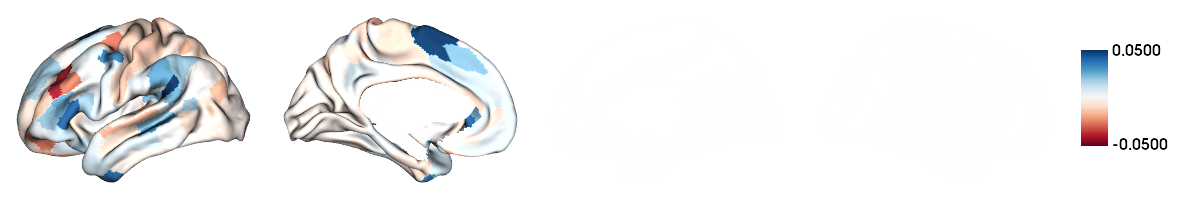

In [37]:
intra_ukb = [None]*3
for i in range(3): # because flip template grad, have to add minus before the score
  intra_ukb[i] = map_to_labels(np.concatenate((-mean_intra_ukb[:,i],np.zeros(180))), labeling, mask=mymask)
  intra_ukb[i][intra_ukb[i]==0]=np.nan

plot_hemispheres(surf_lh, surf_rh, array_name = intra_ukb[0], nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True, interactive = False, zoom = 1.5, embed_nb = True, color_range=(-0.05,0.05),
                 screenshot=True, filename='../figures/s9_ukb_mean_intra.svg')
plot_hemispheres(surf_lh, surf_rh, array_name = intra_ukb[0], nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True, interactive = False, zoom = 1.5, embed_nb = True, color_range=(-0.05,0.05),)

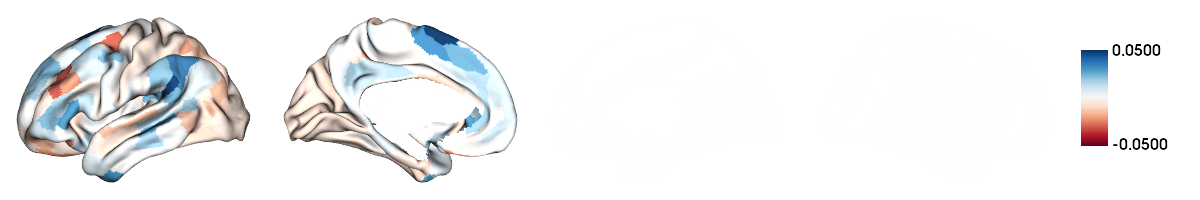

In [38]:
inter_ukb = [None]*3
for i in range(3):
  inter_ukb[i] = map_to_labels(np.concatenate((-mean_inter_ukb[:,i],np.zeros(180))), labeling, mask=mymask)
  inter_ukb[i][inter_ukb[i]==0]=np.nan

plot_hemispheres(surf_lh, surf_rh, array_name = inter_ukb[0], nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True, interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/s9_ukb_mean_inter.svg',
                 color_range=(-0.05,0.05))
plot_hemispheres(surf_lh, surf_rh, array_name = inter_ukb[0], nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True, interactive = False, zoom = 1.5, embed_nb = True,
                 color_range=(-0.05,0.05))

### correlations of mean AI scores for G1 between HCP and UKB

In [39]:
def spin_human_spearman(x,y):
  # x, y should be one array 
  from brainspace.null_models import SampledSurrogateMaps
  n_surrogate_datasets = 1000

  # Note: number samples must be greater than number neighbors
  num_samples = 40
  num_neighbors = 20
  from scipy.sparse.csgraph import dijkstra
  from brainsmash.mapgen.stats import spearmanr
  distance= dijkstra(np.array(pd.read_csv('../data/LeftParcelGeodesicDistmat.txt',
                                          header=None, delimiter=' ')), directed=False)
  distance_idx_sorted = np.argsort(distance, axis=1)
  ssm = SampledSurrogateMaps(ns=num_samples, knn=num_samples, random_state=0,resample=True)
  ssm.fit(distance, distance_idx_sorted)
  x_surrogates = ssm.randomize(x, n_rep=n_surrogate_datasets)
  surrogate_corrs = spearmanr(y, x_surrogates).flatten()
  r_stat = spearmanr(x, y)[0]
  from brainsmash.mapgen.stats import nonparp
  p = nonparp(r_stat, surrogate_corrs)
  return print('spearmanr = '+ str(r_stat), 'p_value_spin = ', str(p))
def spin_human_pearson(x,y):
  # x, y should be one array 
  from brainspace.null_models import SampledSurrogateMaps
  n_surrogate_datasets = 1000

  # Note: number samples must be greater than number neighbors
  num_samples = 40
  num_neighbors = 20
  from scipy.sparse.csgraph import dijkstra
  distance= dijkstra(np.array(pd.read_csv('../data/LeftParcelGeodesicDistmat.txt',
                                          header=None, delimiter=' ')), directed=False)
  distance_idx_sorted = np.argsort(distance, axis=1)
  ssm = SampledSurrogateMaps(ns=num_samples, knn=num_samples, random_state=0,resample=True)
  ssm.fit(distance, distance_idx_sorted)
  x_surrogates = ssm.randomize(x, n_rep=n_surrogate_datasets)
  from brainsmash.mapgen.stats import pearsonr
  surrogate_corrs = pearsonr(y, x_surrogates).flatten()
  r_stat = pearsonr(x, y)[0]
  from brainsmash.mapgen.stats import nonparp
  p = nonparp(r_stat, surrogate_corrs)
  return print('pearsonr = '+ str(r_stat), 'p_value_spin = ', str(p))

spearmanr = [0.43566365] p_value_spin =  0.0
pearsonr = [0.5922753] p_value_spin =  0.0
SpearmanrResult(correlation=0.4356636521703344, pvalue=9.812679317135583e-10) None None


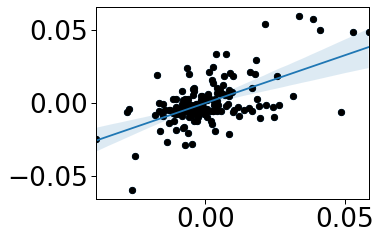

In [40]:
sns.set_context("paper", font_scale = 3)
x, y = -mean_intra_ukb[:,0], mean_intra_hcp[:,0]
f = sns.regplot(x,y,scatter_kws={'s': 40})
ax=f.get_figure()
f.scatter(x, y, s=40, c='black')
f.grid(False)
f.figure.tight_layout()
f.figure.savefig('../figures/s9_ukb_hcp_intra_corr_g1.svg')

print(stats.spearmanr(x,y),spin_human_spearman(x,y),spin_human_pearson(x,y))

spearmanr = [0.3307777] p_value_spin =  0.0
pearsonr = [0.38383709] p_value_spin =  0.0
SpearmanrResult(correlation=0.3307776989001718, pvalue=5.753391774976573e-06) None None


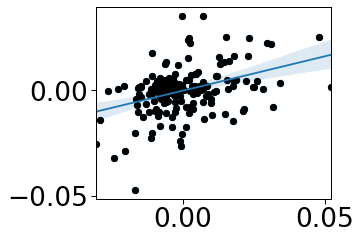

In [41]:
sns.set_context("paper", font_scale = 3)
x, y = -mean_inter_ukb[:,0], mean_inter_hcp[:,0]
f = sns.regplot(x,y,scatter_kws={'s': 40})
ax=f.get_figure()
f.scatter(x, y, s=40, c='black')
f.grid(False)
f.figure.tight_layout()
f.figure.savefig('../figures/s9_ukb_hcp_inter_corr_g1.svg')

print(stats.spearmanr(x,y), spin_human_spearman(x,y), spin_human_pearson(x,y))

In [42]:
import hcp_utils as hcp
from matplotlib.colors import ListedColormap

color =  [[0.      , 0.603922, 0.603922, 1.      ],
          [1., 0., 0., 1.],
          [1.      , 0.611765, 0.      , 1.      ],
          [0., 0., 1., 1.],
          [0.392157, 0.      , 1.      , 1.      ],
          [0., 1., 1., 1.],
          [0.254902, 0.486275, 0.      , 1.      ],
          [0., 1., 0., 1.],
          [0.694118, 0.34902 , 0.156863, 1.      ],
          [0.976471, 0.239216, 0.984314, 1.      ],
          [0.6, 0. , 0.6, 1. ],
          [1., 1., 0., 1.]]

cmap = ListedColormap(color)
base_color = sns.color_palette(color)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [43]:
import os
path = '../data/data_results/supplementary/ukb/gradient/network/intra/'
path_list = os.listdir(path)
path_list.sort()
n=len(path_list)

ca_l = np.array(pd.read_csv('../data/ca_glasser_network.csv',header=None))[:,0][:180]
ca_r = np.array(pd.read_csv('../data/ca_glasser_network.csv',header=None))[:,0][180:]

In [44]:
intra= [None] * n
for i in range(n):
    intra[i] = np.array(pd.read_csv(path+path_list[i],header=None))
intra_g1 = np.array(intra).T[0].T

In [45]:
df_intra = np.concatenate((intra_g1[:,5],intra_g1[:,8],intra_g1[:,10],intra_g1[:,0],
                           intra_g1[:,1],intra_g1[:,2],intra_g1[:,11],intra_g1[:,4],
                           intra_g1[:,9],intra_g1[:,7],intra_g1[:,3],intra_g1[:,6]))
network = np.concatenate((['Language']*n,['Default']*n,['Ventral-Multimodal']*n,
                          ['Primary Visual']*n, ['Secondary Visual']*n,['Somatomotor']*n,
                          ['Orbito-Affective']*n,['Dorsal-attention']*n,['Posterior-Multimodal']*n,
                          ['Auditory']*n,['Cingulo-Opercular']*n,['Frontoparietal']*n))

pd.DataFrame(np.vstack((df_intra,network)).T, columns = ['AI','Network']).\
            to_csv('../data/data_results/supplementary/ukb/gradient/ca_intra_g1.csv',index=None)
df = pd.read_csv('../data/data_results/supplementary/ukb/gradient/ca_intra_g1.csv')

In [46]:
def fdr(p_vals):
    from scipy.stats import rankdata
    ranked_p_values = rankdata(p_vals)
    fdr = p_vals * len(p_vals) / ranked_p_values
    fdr[fdr > 1] = 1
    return fdr

In [47]:
from scipy import stats
sts=np.array([stats.ttest_1samp(intra_g1[:,0],0),
     stats.ttest_1samp(intra_g1[:,1],0),
     stats.ttest_1samp(intra_g1[:,2],0),
     stats.ttest_1samp(intra_g1[:,3],0),
     stats.ttest_1samp(intra_g1[:,4],0),
     stats.ttest_1samp(intra_g1[:,5],0),
     stats.ttest_1samp(intra_g1[:,6],0),
     stats.ttest_1samp(intra_g1[:,7],0),
     stats.ttest_1samp(intra_g1[:,8],0),
     stats.ttest_1samp(intra_g1[:,9],0),
     stats.ttest_1samp(intra_g1[:,10],0),
     stats.ttest_1samp(intra_g1[:,11],0)])
sts

array([[ 3.23624673e+001,  2.11645460e-226],
       [ 6.38591209e+001,  0.00000000e+000],
       [ 6.71205992e+001,  0.00000000e+000],
       [ 4.16990273e+001,  0.00000000e+000],
       [ 6.74394565e+001,  0.00000000e+000],
       [-1.57787671e+002,  0.00000000e+000],
       [-1.13807803e-001,  9.09390809e-001],
       [ 3.52399519e+001,  2.47284228e-267],
       [-8.65150742e+001,  0.00000000e+000],
       [-6.16516822e+001,  0.00000000e+000],
       [ 2.93368185e+001,  6.66034349e-187],
       [-3.18550462e+001,  1.60189538e-219]])

In [48]:
fdr(sts[:,1])

array([2.82193947e-226, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 9.09390809e-001, 3.70926342e-267,
       0.00000000e+000, 0.00000000e+000, 7.26582926e-187, 1.92227446e-219])

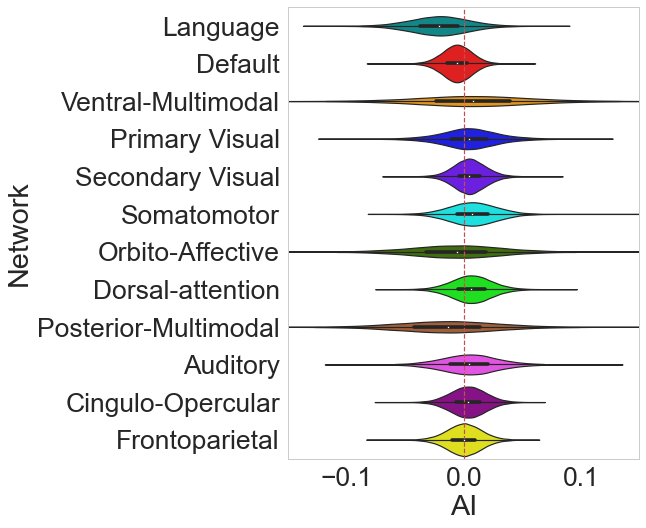

In [49]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_context("paper", font_scale = 3)
sns.set_style("whitegrid")
ax = sns.violinplot(data = df, x = 'AI',y = 'Network', palette = base_color, width=1)
ax.grid(False)
ax.set_xlim(-0.15, 0.15)
ax.axvline(x=0, color='r', linestyle='--')
ax.figure.tight_layout()
ax.figure.savefig('../figures/s9_ukb_ca_intra_g1.png', dpi=300)

In [50]:
inter= [None] * n
for i in range(n):
    inter[i] = np.array(pd.read_csv('../data/data_results/supplementary/ukb/gradient/network/inter/'+path_list[i],header=None))
inter_g1 = np.array(inter).T[0].T

df_inter = np.concatenate((inter_g1[:,5],inter_g1[:,8],inter_g1[:,10],inter_g1[:,0],
                           inter_g1[:,1],inter_g1[:,2],inter_g1[:,11],inter_g1[:,4],
                           inter_g1[:,9],inter_g1[:,7],inter_g1[:,3],inter_g1[:,6]))
network = np.concatenate((['Language']*n,['Default']*n,['Ventral-Multimodal']*n,
                          ['Primary Visual']*n, ['Secondary Visual']*n,['Somatomotor']*n,
                          ['Orbito-Affective']*n,['Dorsal-attention']*n,['Posterior-Multimodal']*n,
                          ['Auditory']*n,['Cingulo-Opercular']*n,['Frontoparietal']*n))

pd.DataFrame(np.vstack((df_inter,network)).T, columns = ['AI','Network']).\
        to_csv('../data/data_results/supplementary/ukb/gradient/ca_inter_g1.csv',index=None)
df = pd.read_csv('../data/data_results/supplementary/ukb/gradient/ca_inter_g1.csv')
sts=np.array([stats.ttest_1samp(inter_g1[:,0],0),
     stats.ttest_1samp(inter_g1[:,1],0),
     stats.ttest_1samp(inter_g1[:,2],0),
     stats.ttest_1samp(inter_g1[:,3],0),
     stats.ttest_1samp(inter_g1[:,4],0),
     stats.ttest_1samp(inter_g1[:,5],0),
     stats.ttest_1samp(inter_g1[:,6],0),
     stats.ttest_1samp(inter_g1[:,7],0),
     stats.ttest_1samp(inter_g1[:,8],0),
     stats.ttest_1samp(inter_g1[:,9],0),
     stats.ttest_1samp(inter_g1[:,10],0),
     stats.ttest_1samp(inter_g1[:,11],0)])
sts

array([[ 6.04019078e+001,  0.00000000e+000],
       [ 1.00119283e+002,  0.00000000e+000],
       [ 3.35551554e+001,  5.68815071e-243],
       [ 6.96777610e+001,  0.00000000e+000],
       [ 1.09021681e+002,  0.00000000e+000],
       [-1.19725901e+002,  0.00000000e+000],
       [-3.70030784e+001,  5.16714589e-294],
       [ 1.25207049e+001,  6.87368484e-036],
       [-9.52822528e+001,  0.00000000e+000],
       [-7.50836260e+001,  0.00000000e+000],
       [ 3.90733899e+001,  0.00000000e+000],
       [-6.04446615e+001,  0.00000000e+000]])

In [51]:
fdr(sts[:,1])

array([0.00000000e+000, 0.00000000e+000, 6.20525533e-243, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 6.20057507e-294, 6.87368484e-036,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000])

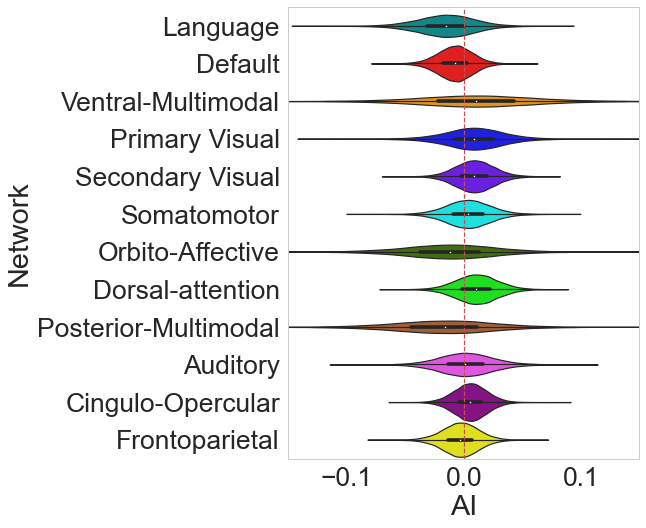

In [52]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_context("paper", font_scale = 3)
sns.set_style("whitegrid")
ax = sns.violinplot(data = df, x = 'AI',y = 'Network', palette = base_color, width=1)
ax.grid(False)
ax.set_xlim(-0.15, 0.15)
ax.axvline(x=0, color='r', linestyle='--')
ax.figure.tight_layout()
ax.figure.savefig('../figures/s9_ukb_ca_inter_g1.png', dpi=300)